# Transit Activity

#### By [Dr. Daniel Apai](http://apai.space) and [Dr. Ben Rackham](http://rackham.space)

In  this  activity  we  will  explore  how  some  extrasolar  planets  can  be  discovered  and characterized by precisely measuring the brightness of their host stars. When planets pass in front of their host stars (as seen from Earth) they cover part of the host star’s disk — making it look  a  tiny  bit  fainter.  These  events  are  called planetary  transits.  The  slight  dimming  has  a characteristic shape and Project EDEN searches for such events to find the planets that cause them.  NASA’s  Kepler  Space  Observatory  has  used  exoplanet  transit  events  to  identify  over 4,000 new extrasolar planets – the largest bounty of new worlds ever!

We will explore how transits can be analyzed — not only to identify the presence of a planet, but  also  to  learn  about  its  basic  properties:  size,  orbital  period,  and  —  with  some  additional information — density and likely composition.

## First let’s clarify a few key concepts:

**Lightcurve:** a figure that shows the brightness of an object (here the host star) over time. For a typical star, this would be a flat line: the star is always the same brightness.

**Transit Event:** an event during which a planet passes in front of its host star (as seen from Earth), blocking a fraction of light from star and causing it to appear dimmer. 

**Transit Depth:** the maximum brightness difference between the in-transit and out-of-transit brightness of the star.

**Ingress:** The first stage of the transit, during which only part of the planet is only obscuring the star.

**Egress:** The final stage of the transit, during which only part of the planet is only obscuring the star.



### Interpreting a Lightcurve with a Transit

In this activity, we will use the Python package `batman` to simulate transit lightcurves.

Let's start by importing some necessary Python packages.

In [7]:
# Import some packages for displaying results
%matplotlib inline
# from IPython.display import display
# from ipywidgets import interactive

# Import standard Python science packages
import astropy.units as u
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

# Import the transit modeling package
import batman

Now let's make an example lightcurve of a hot Jupiter: a Jupiter-sized exoplanet on a very short orbit.

First, we will initialize an object to hold the orbital parameters of our example planet (`params`) and then set the values of the parameters. The parameters provided below describe the orbit of the planet and its orientation, which affect the exact shape of the transit and how symmetric it i. 

In [35]:
params = batman.TransitParams()
params.t0 = 0.                                   # time of inferior conjunction
params.per = 3.                                  # orbital period (days)
params.rp = ((1.0*u.Rjup)/(1.0*u.Rsun)).si.value # planet radius (in units of stellar radii)
params.a = 15.                                   # semi-major axis (in units of stellar radii)
params.inc = 87.                                 # orbital inclination (in degrees)
params.ecc = 0.                                  # eccentricity
params.w = 90.                                   # longitude of periastron (in degrees)
params.u = [0.1, 0.1]                            # limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"                   # limb darkening model

Now let's define the time points we're interested in and generate a model of the transit event.

In [36]:
t = np.linspace(-0.025, 0.025, 100)*params.per # Creates an array of 100 points 
                                               # near the transit time
m = batman.TransitModel(params, t)             # Initializes model

And finally, we will calculate the light curve.

In [37]:
flux = m.light_curve(params)          #calculates light curve

Now let's look at the results.

Text(0,0.5,'Star brightness (%)')

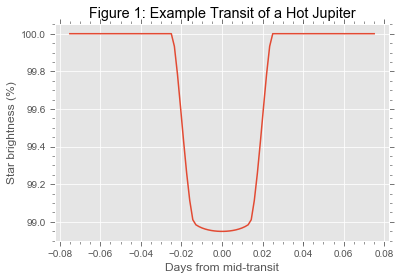

In [39]:
plt.plot(t, flux*100, label=None)
plt.title("Figure 1: Example Transit of a Hot Jupiter")
# plt.legend(loc=3)
plt.xlabel("Days from mid-transit")
plt.ylabel("Star brightness (%)")

Check **Figure 1** (above), estimate the transit depth and identify the ingress/egress stages!

**Orbital period:** The orbital period is simply the time that it takes for a planet to complete an orbit. For Earth this is one year, but some planets have much shorter and some planets have much longer orbital periods. Once the orbital period of a planet and the mass of its host star are known, it is possible to calculate what is the radius of its orbit –in other words, how far is it from its host star.
How do you think the orbital period can be measured for a transiting planet from its host star’s lightcurve?

## The Size of a Planet 

The larger the planet the larger fraction of its host star it can cover. A planet as large as its host star (an unrealistic example) could cover the entire star from view. In reality, most planets are very smaller, compared  to even the smallest stars. Therefore, they only cover part a small fraction of the host star’s disk.

Draw a view of a planetary transit as seen from Earth. Use circles to represent the star and the planet. Mark the radius of the star ($R_{*}$) and the radius of the planet ($R_{p}$) on the figure. The mass of the star is $M_{*}$ and the mass of the planet is $M_{p}$.

Discuss with your partner which factors influence the transit depth.
Which of the following formula may describe best the transit depth and why?

A)  $\tau_{d} = (M_{*}^{2} R_{*}) / (M_{p}^{2} R_{p})$ 

B)  $\tau_{d} = R_{*} / R_{p}$ 

C)  $\tau_{d} = M_{*} / M_{p}$ 

D)  $\tau_{d} = R_{p}^{2} / R_{*}^{2}$ 

### The Transit of HD209458

Now let's simulate the light curve of an actual transiting exoplanet and see if we can determine its size!

First, we will define the time points we are interested in.